In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import pystreamgraph
import random
import colorsys

In [76]:
# Gen. some bogus data
data = []
colors = []
labels = ["one", "two", "three", "four", "five"]
for layer in range(0,5):
  x = []
  y = []
  for i in range(0,20):
    x.append(i)
    y.append(random.uniform(500,10000))
  data.append(list(zip(x,y)))
  colors.append(colorsys.hsv_to_rgb(0.588, 0.2, random.uniform(0.4,0.7)))

sg = pystreamgraph.StreamGraph(data, colors=colors, labels=labels)
sg.draw("Stacked_Graph.test.svg", "Stacked_Graph", width=512, height=512)
sg.draw("Theme_River.test.svg", "Theme_River", show_labels=True, width=1600, height=600)
sg.draw("Wiggle.test.svg", "Wiggle")
sg.draw("Weighted_Wiggle.test.svg", "Weighted_Wiggle")

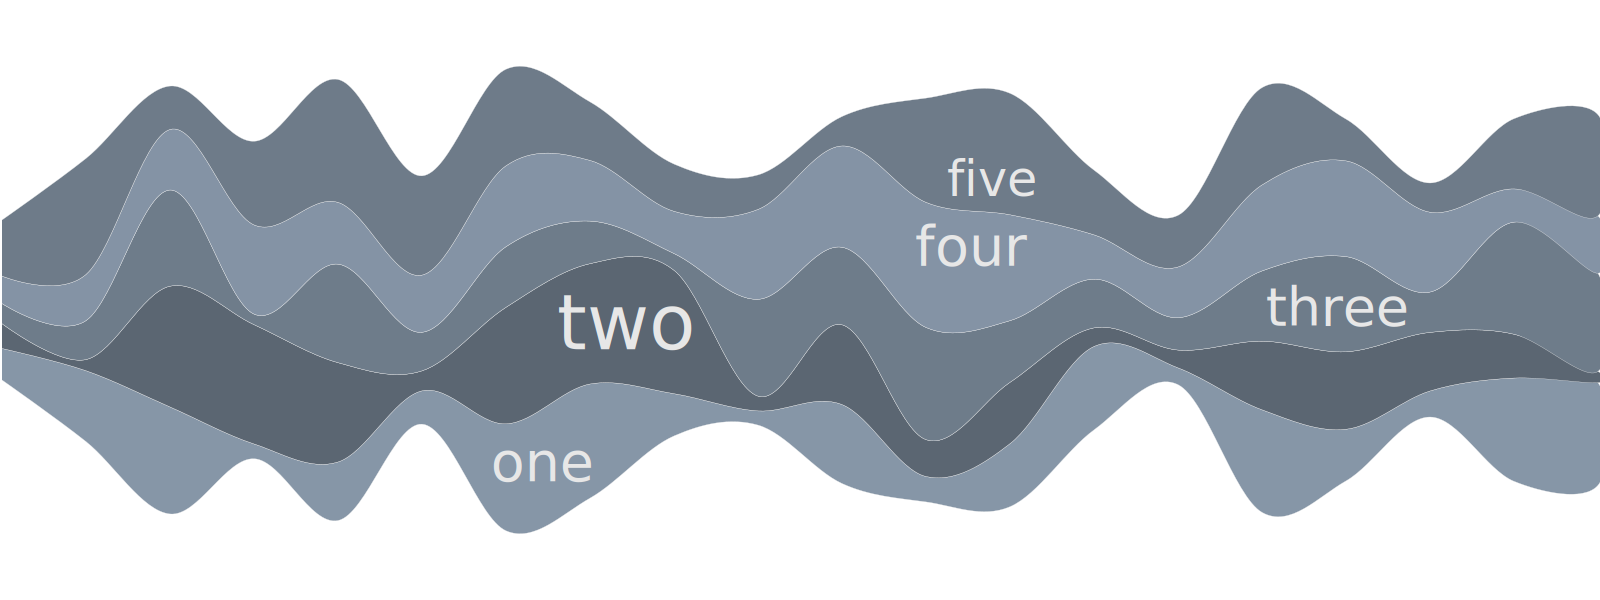

In [75]:
from IPython.core.display import SVG
SVG(filename='Theme_River.test.svg')

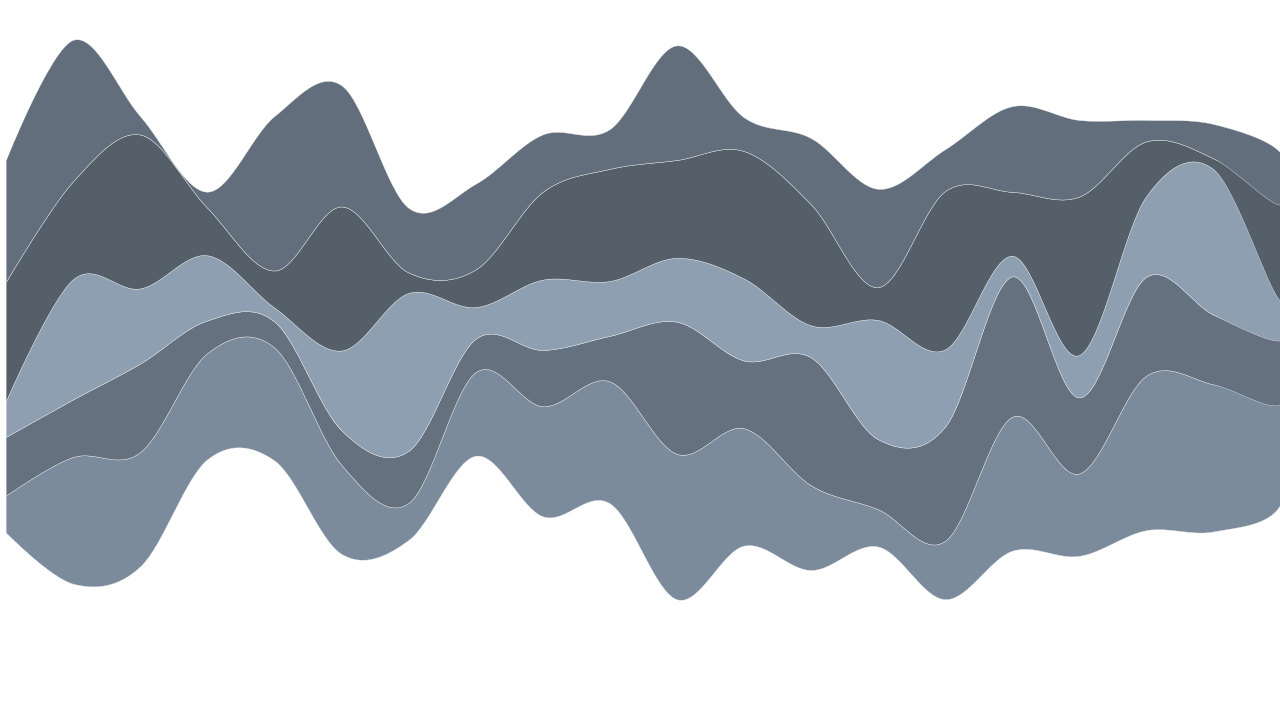

In [77]:
SVG(filename='Wiggle.test.svg')

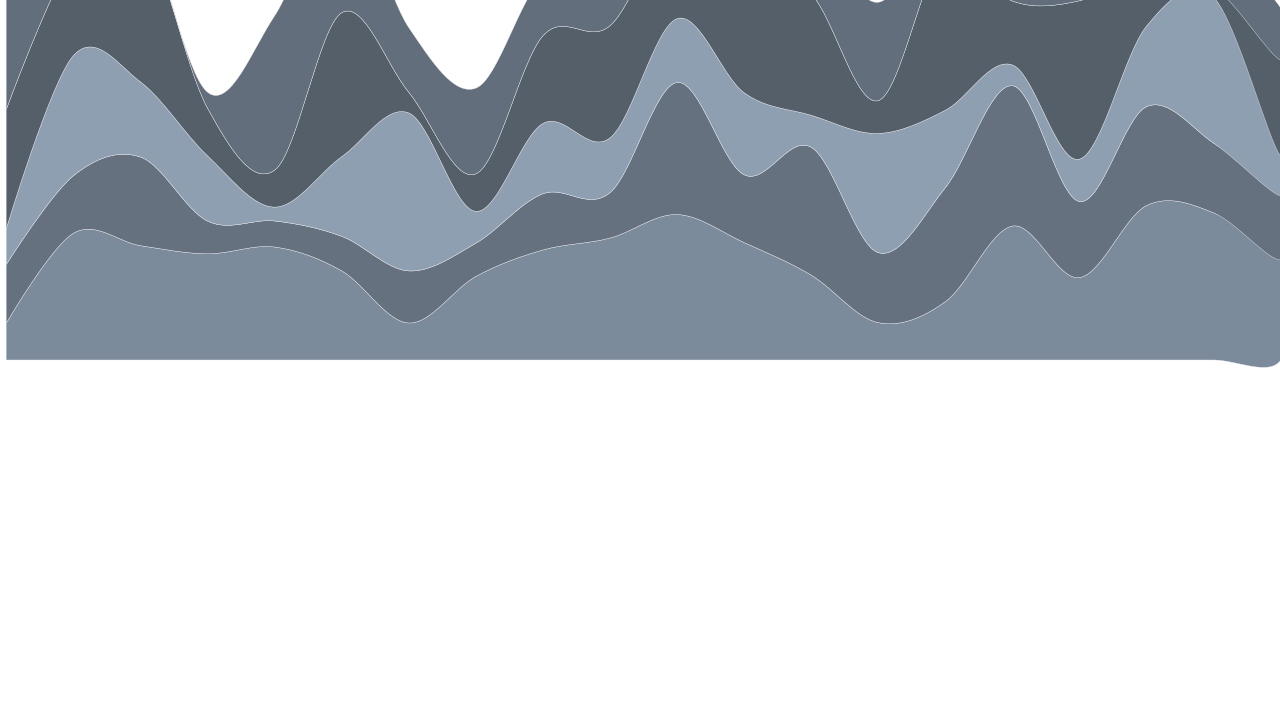

In [78]:
SVG(filename='Weighted_Wiggle.test.svg')

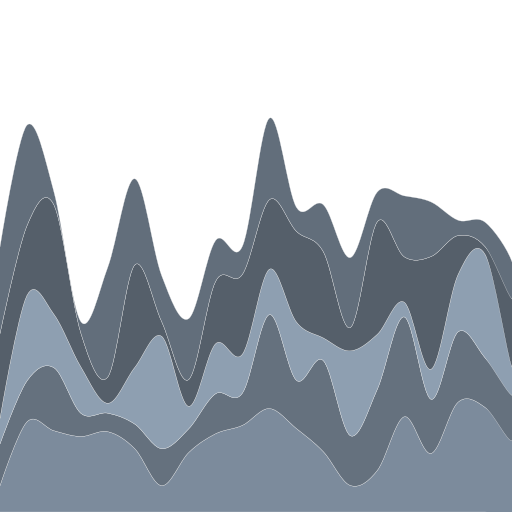

In [79]:
SVG(filename='Stacked_Graph.test.svg')

# Altair

conda install -c conda-forge altair vega_datasets notebook vega

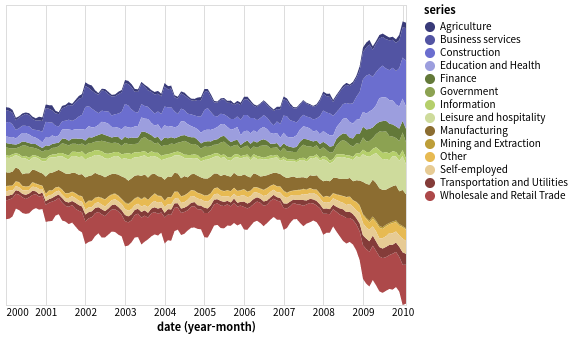

In [83]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

source = data.unemployment_across_industries.url

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

'https://vega.github.io/vega-datasets/data/unemployment-across-industries.json'